# PROSPER LOANS DATA EXPLORATION
## by (Akiteng Gibson)

## Introduction
> The document explores a data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 



# Preliminary Wrangling


In [3]:
# importing all packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
#load dataset into dataframe using pd.read_csv()
#setting low_memory=False to fix the mixed datatypes error in columns(21,22,48)
prosper_loans = pd.read_csv('prosperLoanData.csv', low_memory=False)
prosper_loans.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
65499,7195360375584703651DB9C,1218324,2014-02-18 06:05:53.907000000,NaN,36,Current,NaN,0.14751,0.1189,0.1089,...,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,1.0
19852,592A3574097534015D33707,726251,2013-03-12 11:53:44,NaN,36,Current,NaN,0.25781,0.2199,0.2099,...,-33.07,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,69.0
8519,0A9A33817875226046DCF1F,100328,2007-02-16 07:30:46.047000000,C,36,Completed,2009-10-01 00:00:00,0.13453,0.1275,0.1075,...,-82.60,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,119.0
56476,B797355175596835371A2B1,604890,2012-06-27 10:20:39.497000000,NaN,60,Chargedoff,2013-01-03 00:00:00,0.35838,0.3304,0.3204,...,-3.40,0.0,3975.27,3975.27,0.0,1.0,0.0,0.0,0.0,12.0
66358,7C3E3599753861590585EED,1074754,2014-01-01 13:57:16.093000000,NaN,36,Current,NaN,0.26149,0.2235,0.2135,...,-12.74,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,1.0
44509,8BA63578547546437B6C809,777358,2013-05-13 00:56:29,NaN,36,Current,NaN,0.20462,0.1679,0.1579,...,-13.81,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,34.0
35842,B2A433767064320286CD85C,79060,2006-12-28 18:40:57.067000000,HR,36,Defaulted,2007-09-06 00:00:00,0.24253,0.2300,0.1950,...,-1.83,0.0,1435.21,1435.20,0.0,1.0,0.0,0.0,0.0,36.0
38716,C15A35385668272506DC4DE,555220,2012-01-30 08:51:32.947000000,NaN,60,Current,NaN,0.15784,0.1396,0.1296,...,-427.42,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,456.0
87771,D51935886855427000E44A5,915830,2013-09-16 17:39:54.340000000,NaN,36,Current,NaN,0.22875,0.1915,0.1815,...,-60.20,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,1.0
60711,E0BD336517748602477935C,18488,2006-06-08 12:08:54.037000000,HR,36,Completed,2009-06-19 00:00:00,0.29525,0.2875,0.2825,...,-43.29,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,41.0


In [5]:
#Dropping columns that are not necessary for exploartion and visualization
prosperloans_df= prosper_loans.drop(columns=['ListingNumber','ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn','ProsperRating (Alpha)',
       'Occupation','EmploymentStatusDuration', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio',
       'StatedMonthlyIncome', 'LoanKey',
       'TotalProsperPaymentsBilled', 
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing',
       'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
       'LoanMonthsSinceOrigination',
       'LoanOriginationDate', 'LoanOriginationQuarter',
       'MonthlyLoanPayment',
       'LP_CustomerPrincipalPayments', 'LP_ServiceFees',
       'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss',
       'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations',
       'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount'])



In [15]:
prosperloans_df.head()

,ListingKey,ListingCreationDate,CreditGrade,Term,LoanStatus,LenderYield,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),BorrowerState,...,IncomeRange,IncomeVerifiable,TotalProsperLoans,OnTimeProsperPayments,LoanNumber,LoanOriginalAmount,MemberKey,LP_CustomerPayments,LP_InterestandFees,Investors
0,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,C,36,Completed,0.1380,NaN,NaN,0,CO,...,"$25,000-49,999",True,NaN,NaN,19141.0,9425.0,1F3E3376408759268057EDA,11396.14,1971.14,258.0
1,10273602499503308B223C1,2014-02-27 08:28:07.900000000,NaN,36,Current,0.0820,6.0,7.0,2,CO,...,"$50,000-74,999",True,NaN,NaN,134815.0,10000.0,1D13370546739025387B2F4,0.00,0.00,1.0
2,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,HR,36,Completed,0.2400,NaN,NaN,0,GA,...,Not displayed,True,NaN,NaN,6466.0,3001.0,5F7033715035555618FA612,4186.63,1185.63,41.0
3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,NaN,36,Current,0.0874,6.0,9.0,16,GA,...,"$25,000-49,999",True,NaN,NaN,77296.0,10000.0,9ADE356069835475068C6D2,5143.20,1052.11,158.0
4,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,NaN,36,Current,0.1985,3.0,4.0,2,MN,...,"$100,000+",True,1.0,11.0,102670.0,15000.0,36CE356043264555721F06C,2819.85,1256.63,20.0


In [6]:
#Dropping Null values that is pre-2009 loans
prosperloans_df1 = prosperloans_df.dropna(subset=['CreditGrade'])

#dropping borrowers which did not specify their Employment Status. THe Outliers will not affect the analysis 
prosperloans_df2 = prosperloans_df1.dropna(subset=['EmploymentStatus'])

#Changing the ListingCreationDate data type from object to Datetime
prosperloans_df2['ListingCreationDate']=pd.to_datetime(prosperloans_df2['ListingCreationDate'])

index_names = prosperloans_df2[ prosperloans_df2['IncomeRange'] == 'Not displayed' ].index
prosperloans_df2.drop(index_names, inplace = True)

prosperloans_df2['IncomeRange'] = prosperloans_df2['IncomeRange'].replace(['Not employed'],'0')

prosperloans_df2['IncomeRange'] = prosperloans_df2['IncomeRange'].str.replace('$', '')

prosperloans_df2.rename (columns={'ProsperRating': 'Prosper_Rating'}, inplace=True) 

prosperloans_df2.info()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/opt/conda/

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17971 entries, 0 to 96712
Data columns (total 23 columns):
ListingKey                   17971 non-null object
ListingCreationDate          17971 non-null datetime64[ns]
CreditGrade                  17971 non-null object
Term                         17971 non-null int64
LoanStatus                   17971 non-null object
LenderYield                  17971 non-null float64
ProsperRating (numeric)      0 non-null float64
ProsperScore                 0 non-null float64
ListingCategory (numeric)    17971 non-null int64
BorrowerState                16527 non-null object
EmploymentStatus             17971 non-null object
IsBorrowerHomeowner          17971 non-null object
CurrentlyInGroup             17971 non-null object
IncomeRange                  17971 non-null object
IncomeVerifiable             17971 non-null object
TotalProsperLoans            1879 non-null float64
OnTimeProsperPayments        1879 non-null float64
LoanNumber             

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [7]:
prosperloans_df2.sample(5)

,ListingKey,ListingCreationDate,CreditGrade,Term,LoanStatus,LenderYield,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),BorrowerState,...,IncomeRange,IncomeVerifiable,TotalProsperLoans,OnTimeProsperPayments,LoanNumber,LoanOriginalAmount,MemberKey,LP_CustomerPayments,LP_InterestandFees,Investors
93740,26FB343265574227848F038,2008-09-18 15:50:06.980,B,36,Completed,0.140,NaN,NaN,3,FL,...,"100,000+",False,NaN,NaN,37220.0,10000.0,5581343243893562660CE90,12415.24,2415.37,353.0
76593,5CE533818530546786D0A19,2007-02-19 09:55:37.790,D,36,Defaulted,0.260,NaN,NaN,0,NaN,...,"1-24,999",True,NaN,NaN,7863.0,2550.0,AC043380709980037DEC875,620.84,324.83,36.0
19716,8D0233958630756585E70A4,2007-07-20 07:37:58.080,AA,36,Chargedoff,0.121,NaN,NaN,0,GA,...,"75,000-99,999",True,NaN,NaN,17549.0,25000.0,8D6C3395289548290114AF3,28476.52,5160.14,423.0
33882,B03E3426847648553C50F73,2008-07-12 10:27:14.310,C,36,Completed,0.187,NaN,NaN,3,NC,...,"50,000-74,999",True,NaN,NaN,34271.0,3500.0,0C2C3424829637540FC0871,4658.36,1158.36,87.0
480,01083415991046434E155DD,2008-03-22 02:31:54.603,C,36,Completed,0.340,NaN,NaN,1,CA,...,"1-24,999",True,NaN,NaN,29208.0,6000.0,77A83393446554743F3006C,9777.62,3777.64,54.0


In [17]:
prosperloans_df2.BorrowerState.unique()

array(['CO', nan, 'MI', 'IL', 'CA', 'NE', 'GA', 'WA', 'NJ', 'SC', 'MO',
       'CT', 'AZ', 'PA', 'MN', 'TX', 'VA', 'OH', 'WI', 'NY', 'AR', 'NC',
       'DC', 'OK', 'FL', 'OR', 'MT', 'UT', 'VT', 'NV', 'NH', 'IN', 'AL',
       'ME', 'RI', 'MA', 'NM', 'MD', 'LA', 'KY', 'HI', 'ID', 'KS', 'IA',
       'TN', 'MS', 'WY', 'DE', 'WV', 'AK', 'ND'], dtype=object)

In [18]:
prosperloans_df2.EmploymentStatus.unique()

array(['Self-employed', 'Full-time', 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [7]:
prosperloans_df2['ListingKey'].duplicated().sum()

0

In [20]:
#Descriptive statistics of the data set
print(prosperloans_df2.shape)
print(prosperloans_df2.dtypes)
prosperloans_df2.sample(5)

(17971, 23)
ListingKey                           object
ListingCreationDate          datetime64[ns]
CreditGrade                          object
Term                                  int64
LoanStatus                           object
LenderYield                         float64
ProsperRating (numeric)             float64
ProsperScore                        float64
ListingCategory (numeric)             int64
BorrowerState                        object
EmploymentStatus                     object
IsBorrowerHomeowner                  object
CurrentlyInGroup                     object
IncomeRange                          object
IncomeVerifiable                     object
TotalProsperLoans                   float64
OnTimeProsperPayments               float64
LoanNumber                          float64
LoanOriginalAmount                  float64
MemberKey                            object
LP_CustomerPayments                 float64
LP_InterestandFees                  float64
Investors           

,ListingKey,ListingCreationDate,CreditGrade,Term,LoanStatus,LenderYield,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),BorrowerState,...,IncomeRange,IncomeVerifiable,TotalProsperLoans,OnTimeProsperPayments,LoanNumber,LoanOriginalAmount,MemberKey,LP_CustomerPayments,LP_InterestandFees,Investors
48437,FEB83425584326254E69353,2008-07-02 06:40:54.800,HR,36,Completed,0.2600,NaN,NaN,1,ND,...,"25,000-49,999",True,NaN,NaN,34005.0,2000.0,22293425878524212CC0C9A,3001.68,1002.07,65.0
30692,163134206282166354A1DDD,2008-05-17 10:36:11.897,C,36,Completed,0.1630,NaN,NaN,4,MN,...,"50,000-74,999",True,2.0,8.0,31572.0,3500.0,088D338420866323220C6A1,4424.34,924.34,58.0
72864,F29734192937032667DD9C6,2008-04-29 17:00:44.673,B,36,Completed,0.0745,NaN,NaN,1,HI,...,"25,000-49,999",True,NaN,NaN,30817.0,6500.0,5CCE341748854912613A71C,7295.70,795.70,104.0
47102,A2B834209941242493A0A83,2008-05-21 16:48:58.383,C,36,Defaulted,0.1400,NaN,NaN,2,MO,...,"50,000-74,999",True,1.0,9.0,31983.0,2000.0,BA20339590344052176462E,1039.95,314.38,97.0
26557,2F83341926458875727F2FB,2008-04-17 10:05:31.673,A,36,Chargedoff,0.1170,NaN,NaN,1,FL,...,"75,000-99,999",True,NaN,NaN,30144.0,9800.0,75AA34186625549256F6D05,3983.13,1111.61,234.0


In [21]:
#descriptive features of the dataset
prosperloans_df2.describe()

,Term,LenderYield,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),TotalProsperLoans,OnTimeProsperPayments,LoanNumber,LoanOriginalAmount,LP_CustomerPayments,LP_InterestandFees,Investors
count,17971.0,17971.000000,0.0,0.0,17971.000000,1879.000000,1879.000000,17971.000000,17971.000000,17971.000000,17971.000000,17971.000000
mean,36.0,0.170236,NaN,NaN,1.623393,1.076637,10.532730,24854.647376,6534.015191,6052.577119,1252.156080,133.384397
std,0.0,0.075001,NaN,NaN,2.074612,0.303480,5.479448,8527.491248,5750.415972,6080.493766,1345.211026,124.127537
min,36.0,-0.010000,NaN,NaN,0.000000,1.000000,0.000000,7495.000000,1000.000000,0.000000,0.000000,1.000000
25%,36.0,0.114800,NaN,NaN,0.000000,1.000000,6.000000,17459.500000,2500.000000,1836.510000,376.815000,44.000000
50%,36.0,0.152500,NaN,NaN,1.000000,1.000000,10.000000,26410.000000,5000.000000,4114.880000,837.170000,95.000000
75%,36.0,0.214800,NaN,NaN,3.000000,1.000000,14.000000,32301.500000,8500.000000,7994.210000,1618.820000,182.000000
max,36.0,0.340000,NaN,NaN,7.000000,5.000000,40.000000,38044.000000,25000.000000,40547.700000,15547.700000,913.000000


In [8]:
# Feature Engineering 
# Extracting year from ListingCreationDate
prosperloans_df2['year'] = prosperloans_df2['ListingCreationDate'].dt.year

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
prosperloans_df2.head()

,ListingKey,ListingCreationDate,CreditGrade,Term,LoanStatus,LenderYield,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),BorrowerState,...,IncomeVerifiable,TotalProsperLoans,OnTimeProsperPayments,LoanNumber,LoanOriginalAmount,MemberKey,LP_CustomerPayments,LP_InterestandFees,Investors,year
0,1021339766868145413AB3B,2007-08-26 19:09:29.263,C,36,Completed,0.1380,NaN,NaN,0,CO,...,True,NaN,NaN,19141.0,9425.0,1F3E3376408759268057EDA,11396.14,1971.14,258.0,2007
11,0F1734025150298088A5F2B,2007-10-09 20:28:33.640,C,36,Completed,0.1225,NaN,NaN,0,NaN,...,True,NaN,NaN,20907.0,1000.0,59423376541417552B94BD3,1011.65,11.65,53.0,2007
21,1017340630713945364DA6B,2007-11-30 20:33:49.227,D,36,Completed,0.1975,NaN,NaN,0,MI,...,True,NaN,NaN,23565.0,3000.0,27F53404042184361C6DCD9,4061.05,1061.05,53.0,2007
46,0F8B34281015537050D4FEC,2008-08-05 19:42:49.197,C,36,Completed,0.1400,NaN,NaN,1,IL,...,True,1.0,9.0,35508.0,4000.0,98C934028624318592C6882,4667.64,667.64,103.0,2008
59,100634009060155161268D8,2007-09-18 13:19:02.487,C,36,Completed,0.1500,NaN,NaN,0,IL,...,True,NaN,NaN,19632.0,7000.0,D23A3400133972126A51A5C,8861.23,1861.43,193.0,2007


In [8]:
df7 = prosperloans_df2['year'].value_counts()
df7

2008    9402
2007    8561
2009       8
Name: year, dtype: int64

In [15]:
prosperloans_df2.IncomeRange.unique()

array(['25,000-49,999', '1-24,999', '50,000-74,999', '0', '75,000-99,999',
       '100,000+'], dtype=object)

## Dataset Overview

## Univariate Exploration

### What is the structure of your dataset?

> This data set contains 22,655 pre-2009 loans with 15 variables on each loan, including ListingKey,                       ListingCreationDate, CreditGrade,Term, LoanStatus, ProsperScore, ListingCategory (numeric), EmploymentStatus, IsBorrowerHomeowner,IncomeRange, IncomeVerifiable, TotalProsperLoans, OnTimeProsperPayments,                           LP_CustomerPayments. The data after wrangling, a clean dataset of 17971 loans record remained.               
### What is/are the main feature(s) of interest in your dataset?

> I am mainly interested on which Borrower characteristics can determine the borrower ability to repay the loan. Secondly, I will wish to investigate which borrowers' income range is assocaited with high interest gained by the lender.

However, the investigation of the dataset is not only limited to this, more questions will be posted on the Questions markdown cell

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that IsBorrowerHomeowner and EmploymentStatus will be greatly useful in determining the LoanStatus. Again, IncomeRange and IncomeVerifiable will determine the highest LP_InterestandFees gained by the lender.

## Question to Answer

In this section, I will list the questions I will try to answer while analyzing the dataset categorizing them under Univariate, Bivariate, and Multivariate Data Exploration

### Univariate Data Exploration Questions

1. Loan Status distribution
2. Employment Status distribution
3. Income Range distribution
4. Listing Creation date distribution
5. Lp_customer payment distribution
6. Lp_interest and Fees

### Bivariate Data Exploration Questions

1. Relationship between Loan status and Employment Status
2. Relationship between Employment Status and Lp_customer payment
3. Relationship between is Borrower Home owner and Loan Status
4. Relationship between Income Range and Lp_interest and Fees
5. Relationship between listing creation date and LP_customer payment 
6. Relationship Between Income verifiable and loan Satus/ income verifiable and customer payment

### Multivariate Data Exploration Questions

1. What is the Correlation between loan status, LP_interestandFees and the employment status of the borrowers?
2. What is the correlation between the loan status, LP_Customerpayments and the credit grades assigned to the borrowers?
3. What is the correlation between loan status, LP_interestandFees and the employment status of the borrowers?
4. What is the correlation between loanstatus, LP_Customerpaymentss and if the borrower is home owner?

###  DATASET  ANALYSIS

In this section I will use Question-Visualization-Observations framework repeatedly to explore the features in the dataset.  
  
To make the visualization code easier, let me define a helper function that will setup the basics for the graph like figure size, labels, and titles.

In [9]:
# base color to make all graph similar
base_color = sb.color_palette()[0]


def figure_basics(title: str, xlabel: str="", ylabel: str="", x_double: bool=False, y_double: bool=False):
    """A function to setup shared setting between graphs

    Args:
        title (str): Graph title
        xlabel (str, optional): Text for x label. Defaults to "".
        ylabel (str, optional): Text for y label. Defaults to "".
        x_double (bool, optional): A boolean value to make the graph double in size in x axis. Defaults to False.
        y_double (bool, optional): A boolean value to make the graph double in size in y axis. Defaults to False.
    """
    plt.figure(figsize=(24 if x_double else 12, 16 if y_double else 8))
    
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

### What is the loan Status distribution?

In [10]:
y=prosperloans_df2['LoanStatus'].value_counts()
y

Completed     11595
Chargedoff     4452
Defaulted      1924
Name: LoanStatus, dtype: int64

Text(0.5,1,'LOAN PAYMENT STATISTICS')

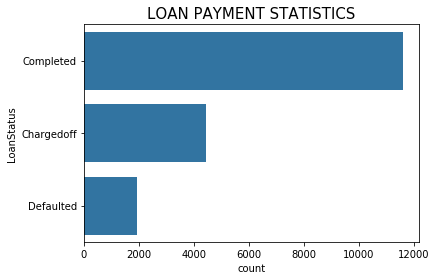

In [10]:
#Loan Status distribution
base_color = sb.color_palette()[0]

sb.countplot(data=prosperloans_df2, y='LoanStatus', color=base_color);
plt.title('LOAN PAYMENT STATISTICS', fontsize=15)

#### Observation
According to the above bar graph, Most of the loans were completed and Defaulted loans were nearly 2000 

### What is the distribution of borrowers employment status?

Text(0.5,1,'BORROWERS EMPLOYMENT STATUS STATISTICS')

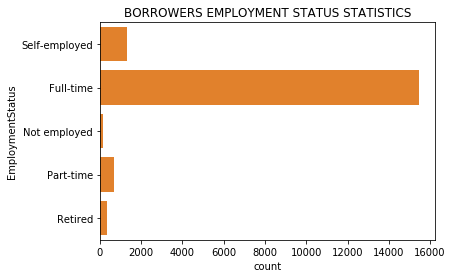

In [11]:
#Distribution of Employment Status
c=sb.color_palette()[1]
sb.countplot(data=prosperloans_df2, y='EmploymentStatus', color= c);
plt.title('BORROWERS EMPLOYMENT STATUS STATISTICS', fontsize=12)

#### observation
Most of the borrowers were full time employed followed by self_employed class. Few unemployed people borrowed the loan

### What is the distribution of Income range of the borrowers?

Text(0.5,1,'BORROWERS INCOME RANGES DISTRIBUTION')

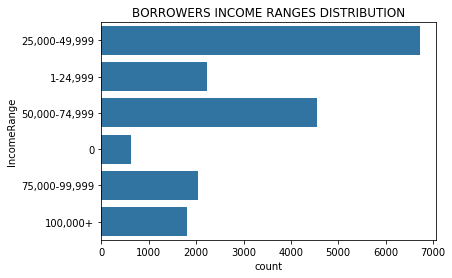

In [12]:
#Income range distribution
sb.countplot(data = prosperloans_df2, y = 'IncomeRange',color=base_color)
plt.title('BORROWERS INCOME RANGES DISTRIBUTION', fontsize=12)

#### Observation
Accroding to the figure above, most of the borrowers income ranged from (25,000 to 49,000 dollars) then followed by (50,000 to 74,999 dollars) income range. Borrowers with (0 dollars) income or and unemploed were the least.

### What is the distribution of borrowers per year?

Text(0.5,1,'LOANS DISTRIBUTION PER YEAR')

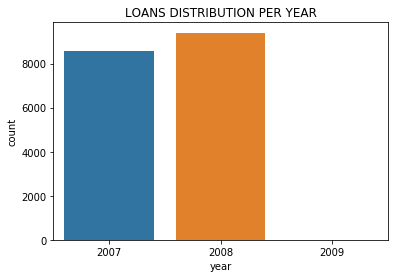

In [13]:
#Distribution of loans per year
sb.countplot(data = prosperloans_df2, x= 'year')
plt.title('LOANS DISTRIBUTION PER YEAR', fontsize=12)

#### Observation
Given the sample of the datset analysed, most loans were record in 2008 followed closely by the previous year 2007. In 2009, ony 1 loan was issued

### What is the distribution o borrowers per Credit Grade?

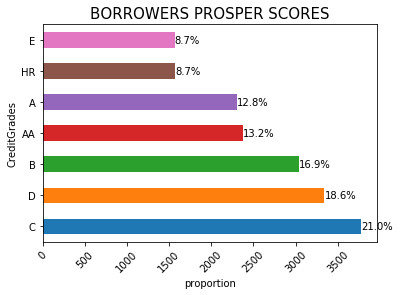

In [14]:
#Returns the sum of all not-null values in 'type' column
p_list = prosperloans_df2['CreditGrade'].value_counts().sum()


# Count the frequency of unique values in the `type` column of pkmn_types dataframe. 
# By default, returns the decreasing order of the frequency.
type_counts = prosperloans_df2['CreditGrade'].value_counts()
type_order = type_counts.index

#ploting the plot with resopective labels
prosperloans_df2.CreditGrade.value_counts(ascending=False).tail(10).plot.barh();
# naming the labels
plt.title('BORROWERS PROSPER SCORES', fontsize=15)
plt.xlabel('proportion'),
plt.ylabel('CreditGrades');

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=45) 

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/p_list)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')



#### Observation
The figure above shows the proportions of borrowers per Credit Grades from the least to most. According to the statistics on the graph above, 21% of the borrowers had a credit score of C followed by Score D with a significant proportion of 18.6%. While the least proportion of 8.7% had a credit score of E. 

### What id the distribution of LP_Customer Payments?

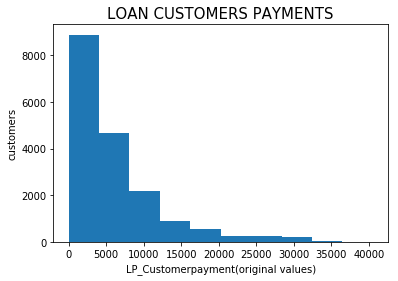

In [15]:
#Distrbution of Customer Payments
bins = np.arange(0, prosperloans_df2['LP_CustomerPayments'].max()+5, 5)
plt.hist(data = prosperloans_df2, x = 'LP_CustomerPayments')

plt.title('LOAN CUSTOMERS PAYMENTS', fontsize=15)
plt.xlabel('LP_Customerpayment(original values)'),
plt.ylabel('customers');


The graph above shows that the data is skewed on the right. lots of points with low values, with a very long tail of data points with large values. It will be therefore necessary to transform the data

In [16]:
#According to the data descriptive statistics, We cannot perform a logarithmic transformation; it's impossible to take a log of zero.
prosperloans_df2['LP_CustomerPayments'].describe()

count    17971.000000
mean      6052.577119
std       6080.493766
min          0.000000
25%       1836.510000
50%       4114.880000
75%       7994.210000
max      40547.700000
Name: LP_CustomerPayments, dtype: float64

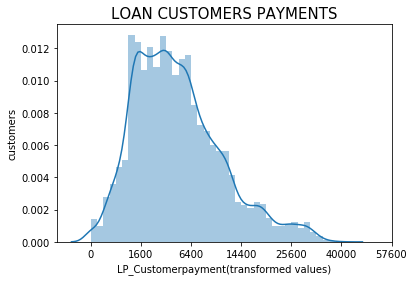

In [17]:
# We transforemed the data systematically by writing a function that applies both the transformation and its inverse.
# We ploted the above data on a square-root transformation.
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(prosperloans_df2['LP_CustomerPayments'].max())+20, 5)

# Plot the scaled data
sb.distplot(prosperloans_df2['LP_CustomerPayments'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(prosperloans_df2['LP_CustomerPayments'].max())+40, 40)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));

plt.title('LOAN CUSTOMERS PAYMENTS', fontsize=15)
plt.xlabel('LP_Customerpayment(transformed values)'),
plt.ylabel('customers');

#### Observation
After the transformation, the data took a normal distribution. The data showed that most of proportions of LP_cutomer payments made on the loan taken were 1600, 5000,and around 7000 dollars approximate values as shown by the peaks on the graph.

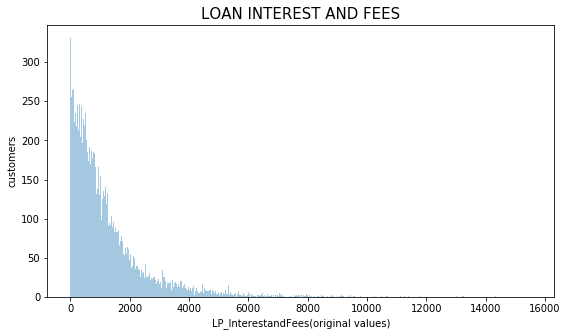

In [18]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, prosperloans_df2['LP_InterestandFees'].max()+1, 20)
sb.distplot(prosperloans_df2['LP_InterestandFees'], bins = bins, kde = False );

plt.title('LOAN INTEREST AND FEES', fontsize=15)
plt.xlabel('LP_InterestandFees(original values)'),
plt.ylabel('customers');

The values of the LP_InterestandFees column was skewed therefore it needed a transformation

In [43]:
prosperloans_df2.LP_InterestandFees.describe()

count    17971.000000
mean      1252.156080
std       1345.211026
min          0.000000
25%        376.815000
50%        837.170000
75%       1618.820000
max      15547.700000
Name: LP_InterestandFees, dtype: float64

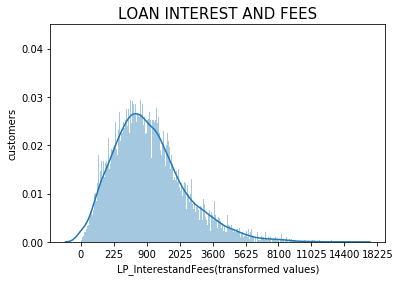

In [20]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(prosperloans_df2['LP_InterestandFees'].max())+0.5, 0.17)

# Plot the scaled data
sb.distplot(prosperloans_df2['LP_InterestandFees'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(prosperloans_df2['LP_InterestandFees'].max())+15, 15)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));

plt.title('LOAN INTEREST AND FEES', fontsize=15)
plt.xlabel('LP_InterestandFees(transformed values)'),
plt.ylabel('customers');

The transformed data of LP_InterestandFees. showing that most LP_Interest and Fees were averagely between 800 to 1000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> given the sample of the prosper dataset analysed, most loans were taken in 2008 followed closely by the previous year 2007. In 2009, ony 1 loan was issued. 21% of the borrowers had a credit score of C followed by Score D with a significant proportion of 18.6%. While the least proportion of 8.7% had a credit score of E. 
When analysing the LP_CustomerPayments data, it was skewed on the right. lots of points with low values, with a very long tail of data points with large values. We transforemed the data systematically by writing a function that applies both the transformation and its inverse.After the transformation, the data took a normal distribution. The data showed that most of proportions of LP_cutomer payments made on the loan taken were 1600, 5000,and around 7000 dollars approximate values as shown by the peaks on the graph.
We ploted the LP_InterestandFees data on a square-root transformation.It showed that most LP_Interest and Fees were averagely between 800 to 1000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The borrowers income ranged from (25,000 to 49,000 dollars) then followed by (50,000 to 74,999 dollars) income range. Borrowers with (0 dollars) income including the unemployed were the least. The 1 loan taken on 2009 was an outlier. we had to drop it.

## Bivariate Exploration

First, we look the relationship between the LenderYield,LP_Customerpayments,LP_Interestsand Fees and Investors. For clear depiction of the whole loan dataset, we used a sample of 100 lenders to construct the below visuals.

In [15]:
numeric_vars = ['LenderYield', 'LP_CustomerPayments', 'LP_InterestandFees','Investors']

prosperloans_df2.shape= (17971, 24)
prosperloans_samp.shape= (100, 24)


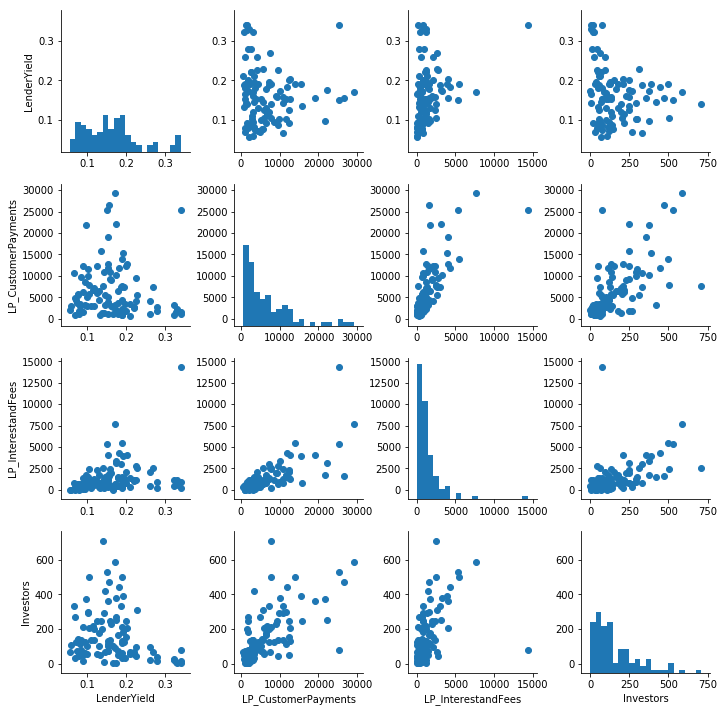

In [18]:
# plot matrix: sample 500 diamonds so that plots are clearer and they render faster
print("prosperloans_df2.shape=",prosperloans_df2.shape)
prosperloans_samp = prosperloans_df2.sample(n=100, replace = False)
print("prosperloans_samp.shape=",prosperloans_samp.shape)

g = sb.PairGrid(data = prosperloans_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

LP_CustomerPayments and LP_InterestandFees is evidently directly related. IF  a lender repays the loan that results to the lender gainng more interest and the more the customer payment the more the amount of interest and fees. Similarly, Investors are highly correlated to more customer payments. They investors more on loans that were likely to be repayed.

Below are three visuals showing the relationship between LoanStatus relationship with Employment Status and CreditGrade. The last one looked on the relationship between Credit Grade and borrowers employment status

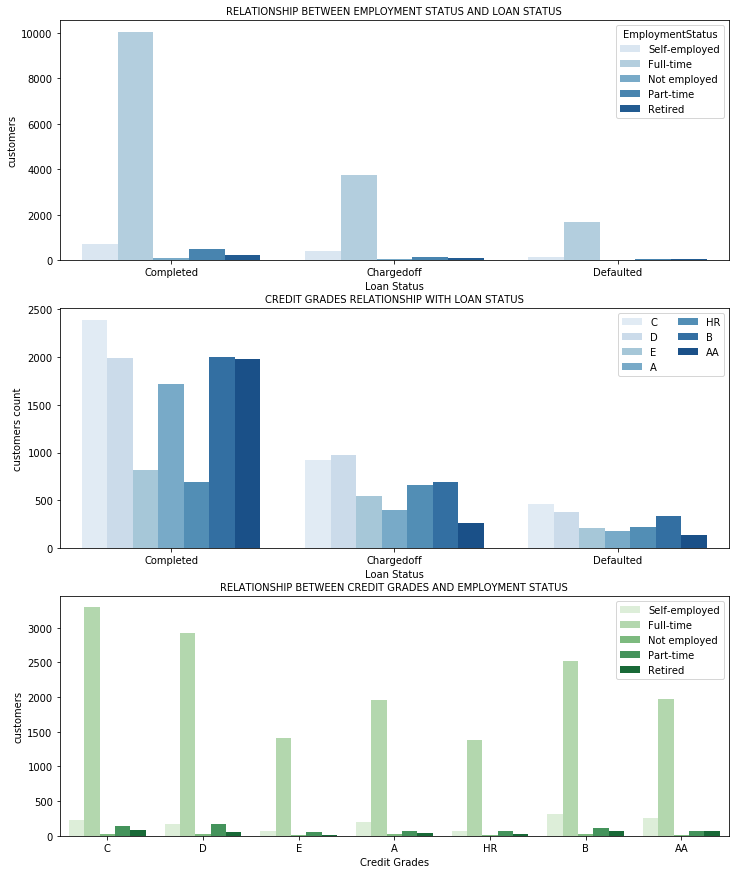

In [24]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [12, 15])

# subplot 1: loanStatus vs EmploymentStatus
plt.subplot(3, 1, 1)
sb.countplot(data = prosperloans_df2, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Blues')
plt.title('RELATIONSHIP BETWEEN EMPLOYMENT STATUS AND LOAN STATUS', fontsize=10)
plt.xlabel('Loan Status'),
plt.ylabel('customers');

# subplot 2: LoanStatus vs. CreditGrade
ax = plt.subplot(3, 1, 2)
sb.countplot(data = prosperloans_df2, x = 'LoanStatus', hue = 'CreditGrade', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.title('CREDIT GRADES RELATIONSHIP WITH LOAN STATUS', fontsize=10)
plt.xlabel('Loan Status'),
plt.ylabel('customers count');

# subplot 3: CreditGrade vs. EmplymentStatus, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = prosperloans_df2, x = 'CreditGrade', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(loc = 1, ncol = 1) # re-arrange legend to remove overlapping
plt.title('RELATIONSHIP BETWEEN CREDIT GRADES AND EMPLOYMENT STATUS', fontsize=10)
plt.xlabel('Credit Grades'),
plt.ylabel('customers');

plt.show()

It is evident on the first plot that most borrower completed their loans repayment. Borrower who were full employed were the most who completed their loan repayment. Overally, Full employed people were the one taking the loans with handful having their loans charged off and some defaulted. But most repayed though.

The second plot looked on the relationship between the loan status of the borrower and their corresponding credit grades. Most borrowers who completed their loans fell on credit grade C followed closely by those in grade D,B and AA. Those with charged off loan status, the  highest were at grade C and D with the least at grade AA. At defaulted loan status. grade C led followed by B. afew borrowers at this status were at credit grade AA.

On the third plot, looking on the relationship between the borrowers employment status and the creridt grade the earned on the loans, full employed borrowers were the one laeding on all the grades. Most earned a credit grade of C while least were at credit grade HR.


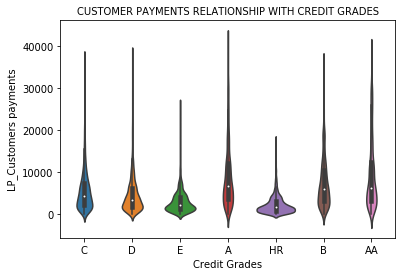

In [25]:

sb.violinplot(data=prosperloans_df2, x='CreditGrade', y='LP_CustomerPayments');
plt.title('CUSTOMER PAYMENTS RELATIONSHIP WITH CREDIT GRADES', fontsize=10)
plt.xlabel('Credit Grades'),
plt.ylabel('LP_Customers payments');

Above a violin plot looking on the relationship between the LP_Customerpaymets vis a vis the respective borrowers credit grades, It is evident that most Customers payments were made by those with a credit score of A followed by those with AA. Borrowers having a credit grade of HR were few and spread.

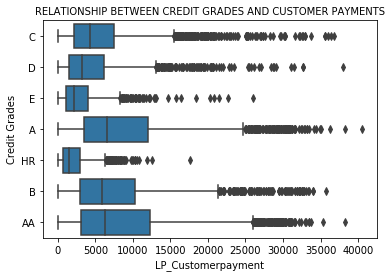

In [26]:
sb.boxplot(data=prosperloans_df2, y='CreditGrade', x='LP_CustomerPayments', color=base_color)
plt.title('RELATIONSHIP BETWEEN CREDIT GRADES AND CUSTOMER PAYMENTS', fontsize=10)
plt.xlabel('LP_Customerpayment'),
plt.ylabel('Credit Grades');

On the relationship between creditGrade and LP_CustomerPayments; AA borrowers were highly correlated same to those with credit grade B and C. The most spread accpording to the whiskers were those with credit grades D,E and HR.

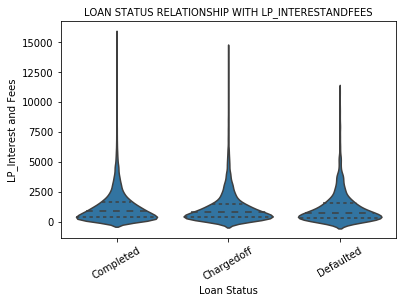

In [27]:
base_color = sb.color_palette()[0]
sb.violinplot(data=prosperloans_df2, x='LoanStatus', y='LP_InterestandFees', color=base_color, inner='quartile')
plt.xticks(rotation=30);
plt.title('LOAN STATUS RELATIONSHIP WITH LP_INTERESTANDFEES', fontsize=10)
plt.xlabel('Loan Status'),
plt.ylabel('LP_Interest and Fees');

The mean of the LP_Interest and fees of completed status loans was higher compared to charged off and defaulted loans. 

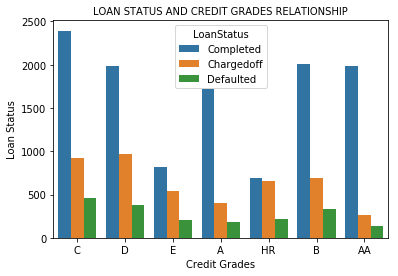

In [29]:
sb.countplot(data = prosperloans_df2, x = 'CreditGrade', hue = 'LoanStatus')
plt.title('LOAN STATUS AND CREDIT GRADES RELATIONSHIP', fontsize=10)
plt.xlabel('Credit Grades'),
plt.ylabel('Loan Status');

The bar graph above showed clearly that that most borrower were at grade C. In both the credit grades, most borrowers completed their loans and few defaulted.

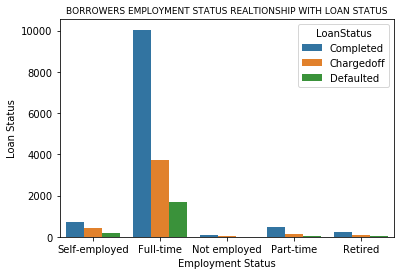

In [31]:
sb.countplot(data= prosperloans_df2, x ='EmploymentStatus', hue ='LoanStatus')
plt.title('BORROWERS EMPLOYMENT STATUS REALTIONSHIP WITH LOAN STATUS', fontsize=9)
plt.xlabel('Employment Status'),
plt.ylabel('Loan Status');

Looking the relationship between the employment status and loan status with a this plot, it is showing that most borrowers were fully employed while unemployed borrowers unlikely got loans. IF you are retired and needed the prosper loan, it was unlikely that you get it according to the data. 

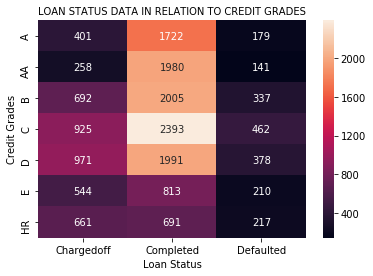

In [33]:
ct_counts = prosperloans_df2.groupby(['CreditGrade', 'LoanStatus']).size()

# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ct_counts = ct_counts.pivot(index = 'CreditGrade', columns = 'LoanStatus', values = 'count')

sb.heatmap(ct_counts, annot = True, fmt = 'd')

plt.title('LOAN STATUS DATA IN RELATION TO CREDIT GRADES', fontsize=10)
plt.xlabel('Loan Status'),
plt.ylabel('Credit Grades');

Most of the borrowers completed their loans and most of them in that loan status had a credit grade of C(2393),B(2005 borrowers),D(1991 borrowers) and AA with 1980 boorwers. The least were at grade HR that is 691 borrowers. 
Those with Chargedoff loan status, the highest werr at grade D and least were at grade AA.
Borrowers who defaulted their loans were likely those with credit garde C and the borrowers with grade AA were unlikley to default their loans.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Borrower who were full employed were the most who completed their loan repayment. Overally, Full employed people were the one taking a lot of loans with handful having their loans charged off and some defaulted. But most repayed though.
Most borrowers who completed their loans fell on credit grade C followed closely by those in grade D,B and AA. Those with charged off loan status, the highest were at grade C and D with the least at grade AA. At defaulted loan status. grade C led followed by B. afew borrowers at this status were at credit grade AA.
Full employed borrowers were the one leading on all the credit grades. Most earned a credit grade of C while least were at credit grade HR.
It is evident that most Customers payments were made by those with a credit score of A followed by those with AA. Borrowers having a credit grade of HR were few and spread.
Most borrowers were fully employed while unemployed borrowers were unlikely to get prosper loans. IF you are retired and needed the prosper loan, it was unlikely that you get it according to the data.
Most of the borrowers completed their loans and most of them in that loan status had a credit grade of C(2393),B(2005 borrowers),D(1991 borrowers) and AA with 1980 boorwers. The least were at grade HR that is 691 borrowers. Those with Chargedoff loan status, the highest werr at grade D and least were at grade AA. Borrowers who defaulted their loans were likely those with credit garde C and the borrowers with grade AA were unlikley to default their loans.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Investors are highly correlated to more customer payments. They invested more on loans that were likely to be repayed.
Clearly,most borrowers were at grade C. In both the credit grades, most borrowers completed their loans and few defaulted.

## Multivariate Exploration


The main focus was to look on the correlation between some of the borrowers characteristics that determined the repayment of the loan taken. Below, we visualized the correlations of those variables

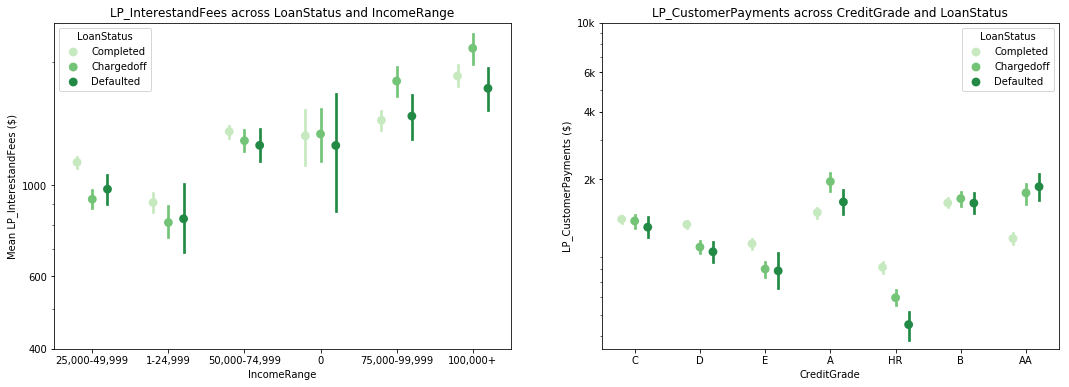

In [90]:
fig, ax = plt.subplots(ncols = 2, figsize = [18,6])

sb.pointplot(data = prosperloans_df2, x = 'IncomeRange', y = 'LP_InterestandFees', hue = 'LoanStatus',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_title('LP_InterestandFees across LoanStatus and IncomeRange')
ax[0].set_ylabel('Mean LP_InterestandFees ($)')
ax[0].set_yscale('log')
ax[0].set_yticks([400, 600, 1000])
ax[0].set_yticklabels(['400', '600', '1000'])
ax[0].set_yticklabels([],minor = True)

sb.pointplot(data = prosperloans_df2, x = 'CreditGrade', y = 'LP_InterestandFees', hue = 'LoanStatus',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_title('LP_CustomerPayments across CreditGrade and LoanStatus')
ax[1].set_ylabel('LP_CustomerPayments ($)')
ax[1].set_yscale('log')
ax[1].set_yticks([2e3, 4e3, 6e3, 1e4])
ax[1].set_yticklabels(['2k', '4k', '6k', '10k'])
ax[1].set_yticklabels([],minor = True)
plt.show();

First, I looked on the correlation between LoanStatus, LP_InterestandFees earned and the income range of the borrower. It was evident that borrowers with an income range of 100,000+ recorded more LP_Interestand Fees while borrower with an income range of 1-24,999 dollors recorded the least. A lot of borrowers with an income range of 25,000-49,999 dollars completed their loans repayment and afew defaulted. A lot of unemployed of 0 income borrowers defaulted their loans.
Looking at the correlation between the loan status, LP_Customerpayments and the credit grade assigned to the borrowers, it was evident that grade A borrowers payed the most LP_customerpayments while those with HR credit grading payed the least.Most of the borrowers with C and D grading completed their loans repayments while most of the borrowers with grading of E and HR defaulted their loans. 

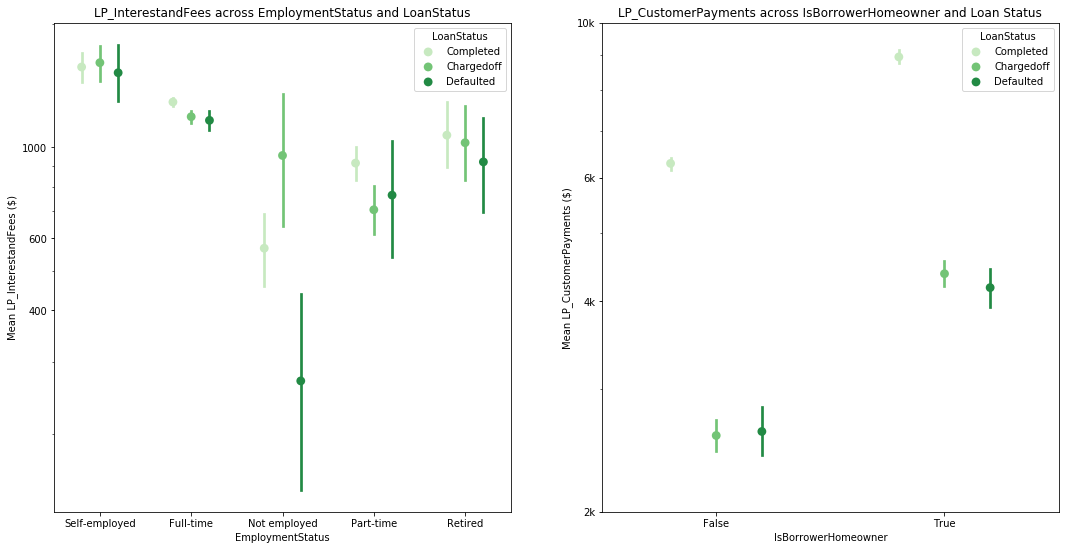

In [11]:
fig, ax = plt.subplots(ncols = 2, figsize = [18,9])

sb.pointplot(data = prosperloans_df2 , x = 'EmploymentStatus', y = 'LP_InterestandFees', hue = 'LoanStatus',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[0])
ax[0].set_title('LP_InterestandFees across EmploymentStatus and LoanStatus')
ax[0].set_ylabel('Mean LP_InterestandFees ($)')
ax[0].set_yscale('log')
ax[0].set_yticks([400, 600, 1000])
ax[0].set_yticklabels(['400', '600', '1000'])
ax[0].set_yticklabels([],minor = True)

sb.pointplot(data = prosperloans_df2, x = 'IsBorrowerHomeowner', y = 'LP_CustomerPayments', hue = 'LoanStatus',
             palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_title('LP_CustomerPayments across IsBorrowerHomeowner and Loan Status')
ax[1].set_ylabel('Mean LP_CustomerPayments ($)')
ax[1].set_yscale('log')
ax[1].set_yticks([2e3, 4e3, 6e3, 1e4])
ax[1].set_yticklabels(['2k', '4k', '6k', '10k'])
ax[1].set_yticklabels([],minor = True)
plt.show();


We also looked on the correlation between loan status, LP_interestandFees and the employment status of the borrowers. The self-employed generally payed generated more LP_Interests and Fees while the unemployed(0 income) recorded the least. Most of the borrowers who completed their loans however, were fully employed while the unemployed despite being few also were likely to charge off and default their loans.
On the hand, looking at the correlation between loanstatus, LP_Customerpaymentss and if the borrower is home owner, it showed that borrowers who were home owners payed more LP_customerpayments while those who were not home owners payed less. Most of home owners borrowers completed their loan repayments compared to the non home owners.

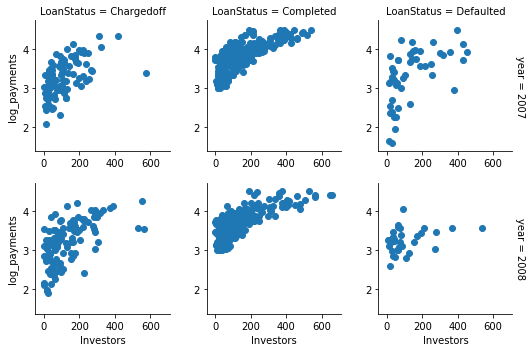

In [95]:
loans_samp = prosperloans_df2.sample(n=800, replace = False)




def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3
    loans_samp['log_payments'] = loans_samp['LP_CustomerPayment'].apply(cuberoot_trans)



g = sb.FacetGrid(data = loans_samp, col = 'LoanStatus', row = 'year', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'Investors', 'log_payments')

Looking at the coorelation between the LP_Customerpayments on each loan status and the respective investors dring each year, we depicted that LP_Customerpayments and investor were highly correlated on the completed loans during the two years.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Looking on the correlation between loan status, LP_interestandFees and the employment status of the borrowers. The self-employed generally payed generated more LP_Interests and Fees while the unemployed(0 income) recorded the least. Most of the borrowers who completed their loans however, were fully employed while the unemployed despite being few also were likely to charge off and default their loans. On the hand, looking at the correlation between loanstatus, LP_Customerpaymentss and if the borrower is home owner, it showed that borrowers who were home owners payed more LP_customerpayments while those who were not home owners payed less. Most of home owners borrowers completed their loan repayments compared to the non home owners.

### Were there any interesting or surprising interactions between features?

> Looking at the correlation between the LP_Customerpayments on each loan status and the respective investors dring each year, we depicted that LP_Customerpayments and investor were highly correlated on the completed loans during the two years.

## Conclusions
>Looking back on the point plots, It is seems the loan repayment status and the the corresponding interest earnings is retalted to the borrowers characteristics including the credit grading. Looking on the correlation between loan status, LP_interestandFees and the employment status of the borrowers. The self-employed generally payed generated more LP_Interests and Fees while the unemployed(0 income) recorded the least. Between, the loan status, LP_interest/LP_Customerpayments and isBorrowerHomeOwner,it showed that borrowers who were home owners payed more LP_customerpayments while those who were not home owners payed less. Most of home owners borrowers completed their loan repayments compared to the non home owners. Also on loan status, LP_interestandFees and borrowers employmentstatus, It was evident that borrowers with an income range of 100,000+ recorded more LP_Interestand Fees while borrower with an income range of 1-24,999 dollors recorded the least. A lot of borrowers with an income range of 25,000-49,999 dollars completed their loans repayment and afew defaulted. A lot of unemployed of 0 income borrowers defaulted their loans. Most of the borrowers with C and D grading completed their loans repayments while most of the borrowers with grading of E and HR defaulted their loans. 
